# Cornerplots of various features for lensed system
### SDSS vs OM10 (realized by Galsim)

The OM10 mock lensed quasar catalog qso_mock.fits contains a list of LSST-like samples. Using the OM10 mock catalog and observation history data, we can generate a toy catalog for SLRealizer. Using the toy catalog, we can null-deblend the catalog and generate the cornerplot to easily compare different features. We use Galsim to null-deblend and realize the catalog. Then, we compared the OM10 features with SDSS features.

In [1]:
from __future__ import print_function
from astropy.table import Table, hstack
import astropy.io.fits as pyfits
import sys, os
import desc.slrealizer
import warnings
warnings.filterwarnings("ignore")
import numpy as np
np.set_printoptions(threshold=np.nan)

/Users/Jenny/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


The lines below enable the jupyter notebook to display inline plots.

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
matplotlib.use('TkAgg')
matplotlib.rc('text', usetex=False)

Populating the interactive namespace from numpy and matplotlib


Here, we initialize SLRealizer constructor

In [3]:
realizer = desc.slrealizer.SLRealizer(observation="/Users/Jenny/Desktop/SLRealizer/data/twinkles_observation_history.csv")

## Drawing the cornerplot

##### For all the cornerplots, the purple ones are SDSS galaxies and the orange ones are OM10 lensed systems.

### I. Size

For `galsim=False` option, the size is defined to be the determinant of covariance matrix, which can be also simplified as:
$$q_{xx} * q_{yy} - q_{xy} * q_{xy}$$. We can notice that the size of the lensed system decreased when we go from $u$ , $g$ , $r$ , $i$, and $z$. This is reasonable because the quasar images will be brighter in the bluer filters, creating larger blended objects. This plot shows a strong correlation between adjacent bands.

For `galsim=True` option, the size is defined to be the convolved gaussian's sigma value.

SDSS samples had a larger spread than the OM10 samples, and their peaks were similar.

##### The size comparison fails because of different unit systems

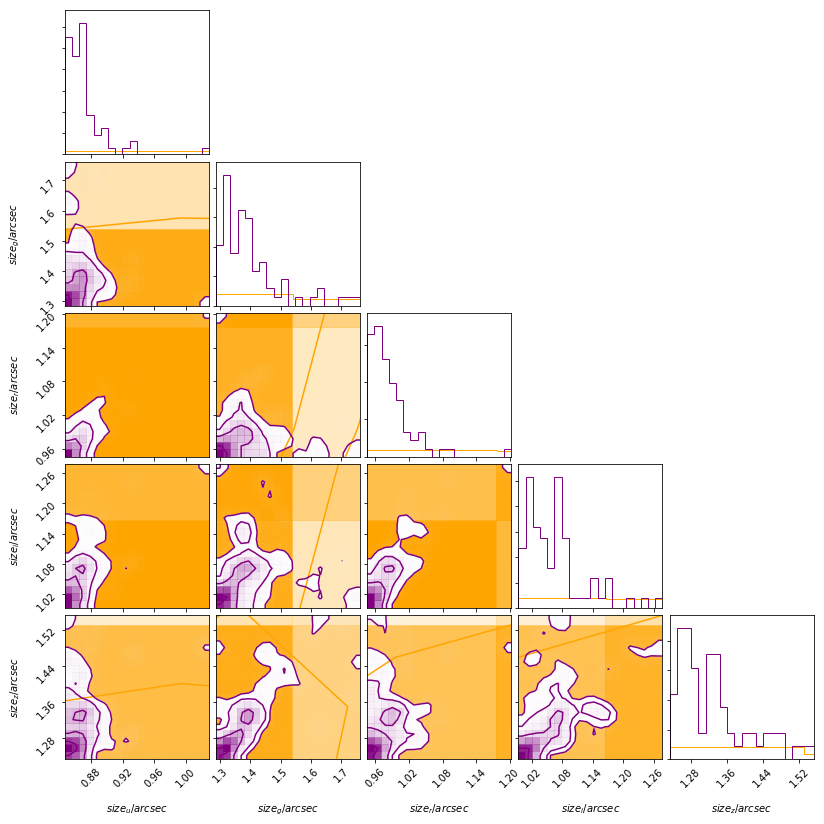

In [4]:
option = ['size']
# This doesnt work

fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', normed=True, option=option)
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', overlap = fig1, color='purple', option=option, normed=True)

### II. First moment along the x axis

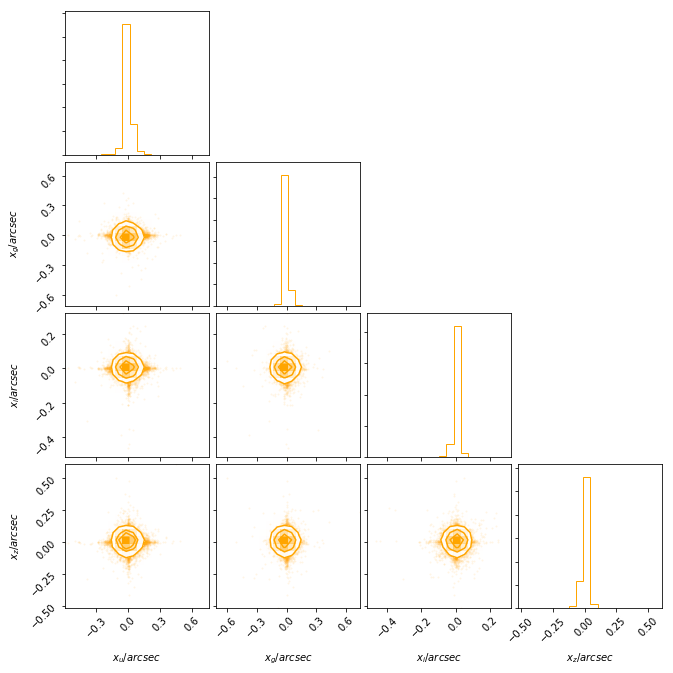

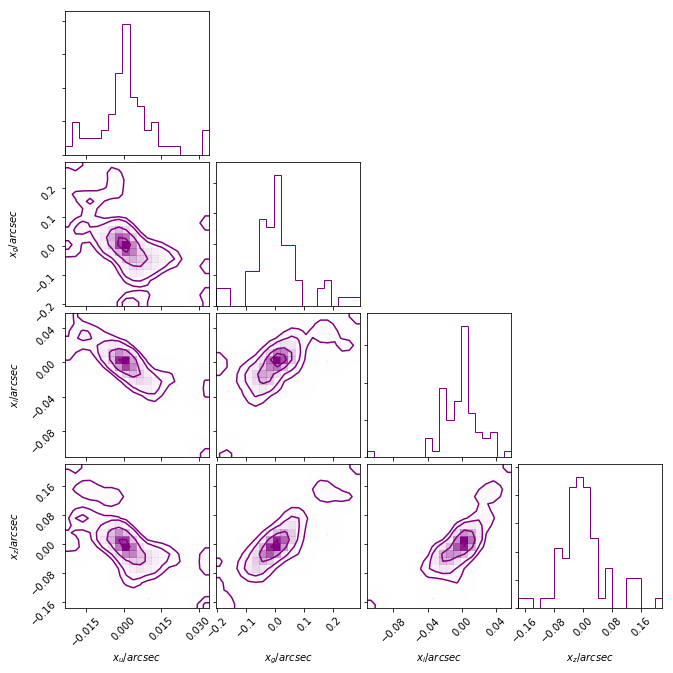

In [5]:
warnings.filterwarnings("ignore")
option = ['x_position']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', option=option, normed=True)

### III. First moment along the y axis

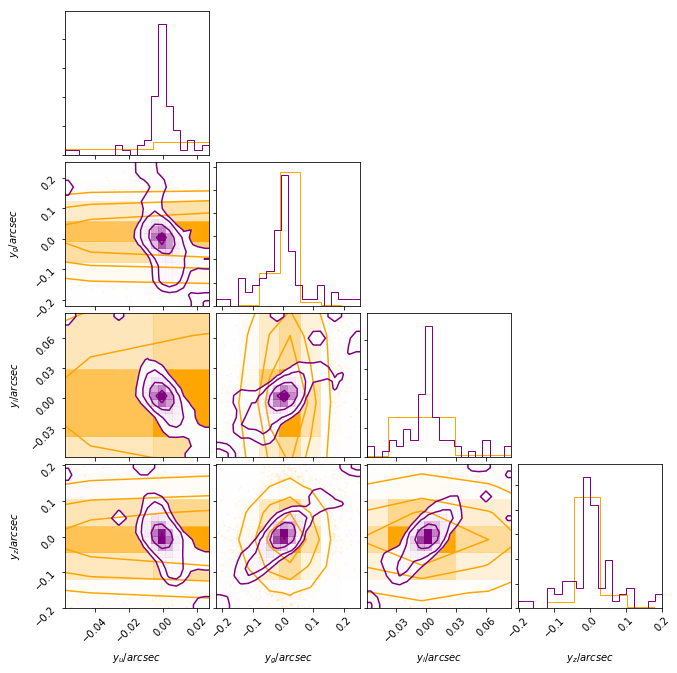

In [6]:
option = ['y_position']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', overlap=fig1, option=option, normed=True)

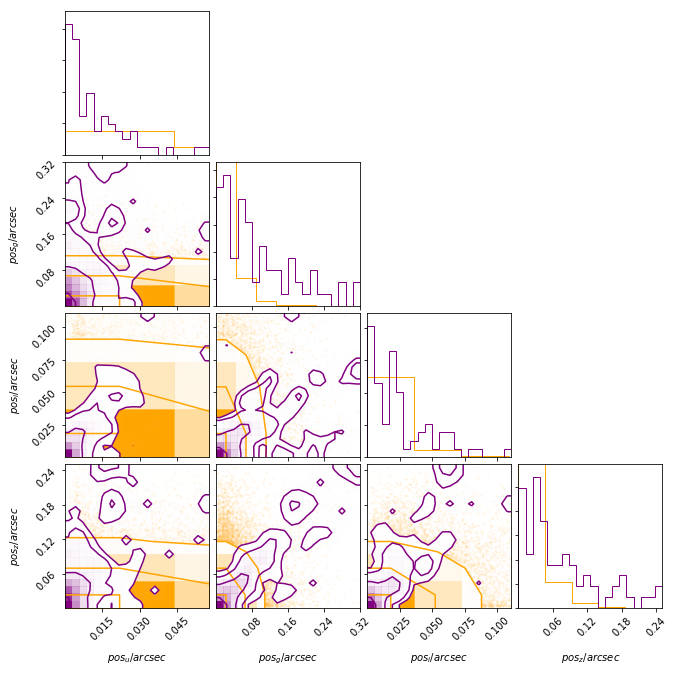

In [7]:
option = ['position']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', option=option, overlap=fig1, normed=True)

### IV. Ellipticity

Ellipticity is defined as $e = \sqrt{e1^2+e2^2}$ where

$e1 = (qxx-qyy)/(qxx+qyy)$

$e2 = 2*qxy/(qxx+qyy)$

By looking at $e$ in each filter, for OM10 lenses, we could notice that $e$ decreased when we went from u, g, r, i, to z. This is also reasonable -- quasar images will be much brighter in the bluer filters. Because the null-deblended source will be stretched in bluer filters, ellipticity will decrease as the wavelength of filters decrease.

* By definition, $e$ has a value from zero to one[0, 1].

The SDSS and OM10 samples have different shapes, and the SDSS samples had a wider spread. However, the peaks of the two distributions were similar.

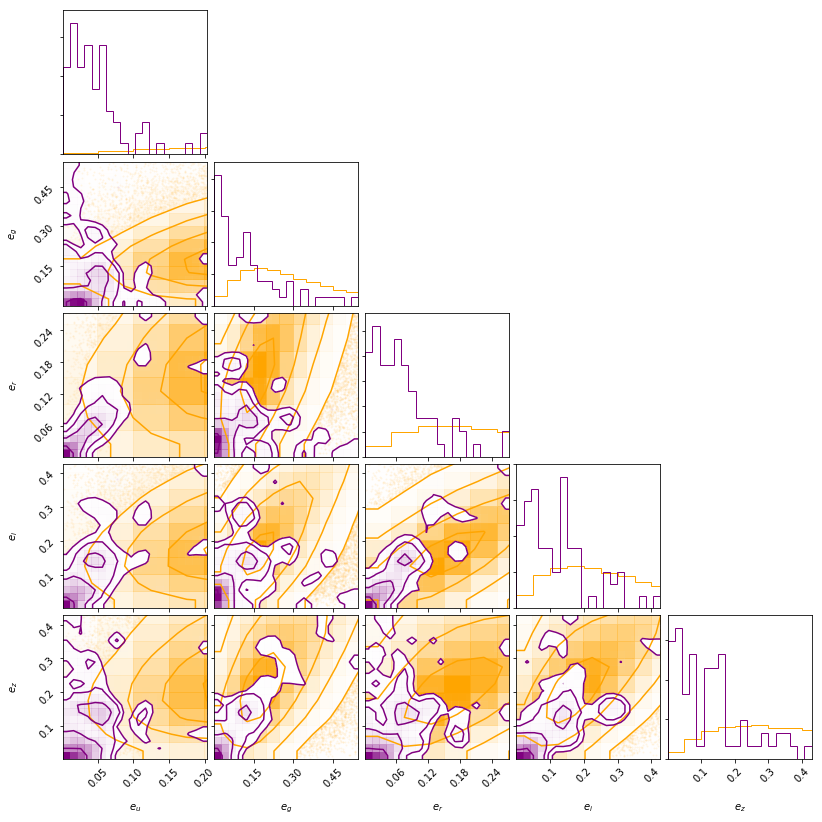

In [ ]:
option = ['ellipticity']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, normed=True, range=[(0, 1), (0, 1), (0, 1), (0, 1), (0, 1)])
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', option=option, overlap=fig1, normed=True)

### V. Color

The distributions had different patterns, but the peaks overlapped with each other. Still, there were significant numbers of OM10 lensed systems that were seperated from SDSS samples.

In [ ]:
option = ['color']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, normed=True, range=[(-1.0, 2.0), (-1.0, 2.0), (-1.0, 2.0), (-1.0, 2.0)])
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', option=option, overlap=fig1, normed=True, range=[(-1.0, 3.0), (-1.0, 3.0), (-1.0, 3.0), (-1.0, 3.0)])

In [ ]:
option = ['phi']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, range=[(-90, 90), (-90, 90),(-90, 90),(-90, 90),(-90, 90)], normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', range=[(-90, 90), (-90, 90),(-90, 90),(-90, 90),(-90, 90)], option=option, overlap=fig1, normed=True)

### VII. Magnitude

This cornerplot plots different magnitudes in different bands. The magnitudes of SDSS and om10 lenses were not that different.

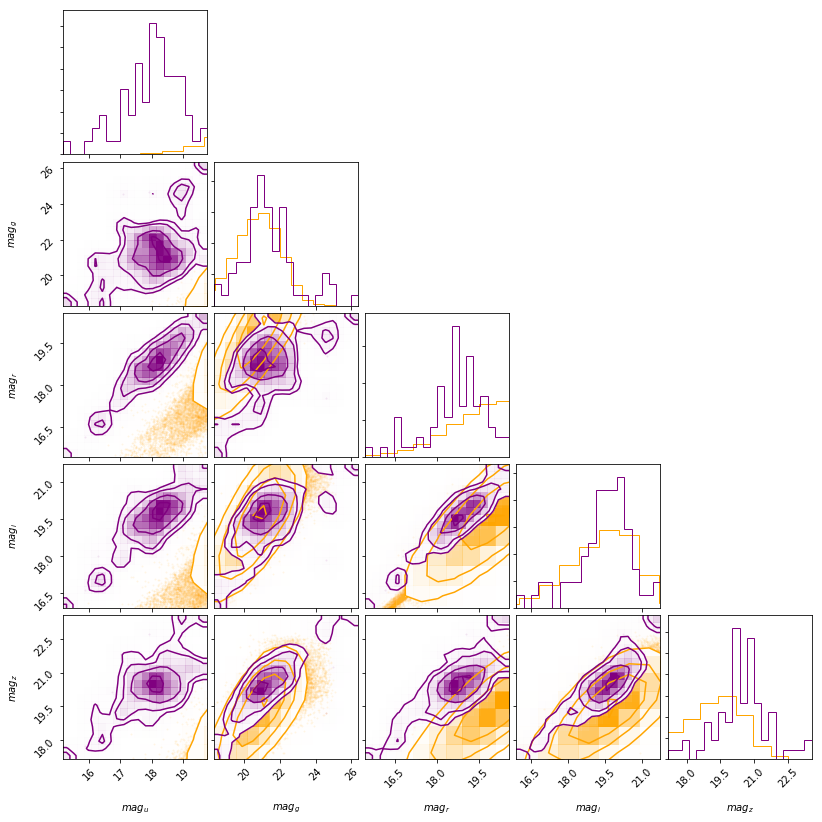

In [4]:
option = ['magnitude']
fig1 = realizer.generate_cornerplot(object_table_dir='../data/sdss_object.csv', color='orange', option=option, normed=True)
fig = realizer.generate_cornerplot(object_table_dir='../data/object_catalog_galsim_noise_perfect.csv', color='purple', option=option, overlap=fig1, normed=True)

### VII. Custom Options

We can enable the custom option -- we can just format the data and draw the cornerplot without using the default option. In order to do so, we have to import pandas, read th sdss and om10 object catalogs, and pass in the `custom` option.

In [ ]:
# custom input
import pandas as pd
object_table = pd.read_csv('../data/object_catalog_galsim_noise_perfect.csv')
sdss_table = pd.read_csv('../data/sdss_object.csv')
option = ['custom']

#### Color index for u-r, r-z, and u-z magnitudes

There were few OM10 systems that could be easily separated from SDSS galaxies, but the patterns were generally similar.

In [ ]:
labels = ['$u-r$', '$r-z$', '$u-z$']
features = np.array([])
u = object_table['u_flux']
r = object_table['r_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
flux_mag_r = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
ur = flux_mag_u - flux_mag_r
rz = flux_mag_r - flux_mag_z
uz = flux_mag_u - flux_mag_z
features= np.append(features, ur)
features= np.append(features, rz)
features= np.append(features, uz)
features = features.reshape(3, len(ur)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
r_sdss = sdss_table['r_flux']
z_sdss = sdss_table['z_flux']
features_sdss = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
flux_mag_r_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(r_sdss)
ur_sdss = flux_mag_u_sdss - flux_mag_r_sdss
rz_sdss = flux_mag_r_sdss - flux_mag_z_sdss
uz_sdss = flux_mag_u_sdss - flux_mag_z_sdss
features_sdss= np.append(features_sdss, ur_sdss)
features_sdss= np.append(features_sdss, rz_sdss)
features_sdss= np.append(features_sdss, uz_sdss)
features_sdss = features_sdss.reshape(3, len(ur_sdss)).transpose()
print(features_sdss)

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=features_sdss, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)


#### Color index for u-z, u-i, and g-z magnitudes

Here, as the bands' wavelengths got farther apart from each other, the difference between the OM10 lensed systems and SDSS systems became really different. Especially, for $u-z$ filter vs other filters, the differences were obvious.

In [ ]:
labels = ['$u-z$', '$u-i$', '$g-z$']
features = np.array([])
u = object_table['u_flux']
g = object_table['g_flux']
z = object_table['r_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
flux_mag_r = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
flux_mag_g = desc.slrealizer.return_zeropoint()-2.5*np.log10(g)
uz = flux_mag_u - flux_mag_z
ur = flux_mag_u - flux_mag_r
gz = flux_mag_g - flux_mag_z
features= np.append(features, uz)
features= np.append(features, ur)
features= np.append(features, gz)
features = features.reshape(3, len(u)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
r_sdss = sdss_table['r_flux']
z_sdss = sdss_table['z_flux']
g_sdss = sdss_table['g_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
flux_mag_r_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(r_sdss)
flux_mag_g_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(g_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
ur_sdss = flux_mag_u_sdss - flux_mag_r_sdss
gz_sdss = flux_mag_g_sdss - flux_mag_z_sdss
sdss_features= np.append(sdss_features, uz_sdss)
sdss_features= np.append(sdss_features, ur_sdss)
sdss_features= np.append(sdss_features, gz_sdss)
sdss_features = sdss_features.reshape(3, len(u_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

#### Color index for u-z, u-i, and g-z magnitudes

In [ ]:
labels = ['$u-z$', '$u-i$', '$g-z$']
features = np.array([])
u = object_table['u_flux']
g = object_table['g_flux']
z = object_table['r_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
flux_mag_r = desc.slrealizer.return_zeropoint()-2.5*np.log10(r)
flux_mag_g = desc.slrealizer.return_zeropoint()-2.5*np.log10(g)
uz = flux_mag_u - flux_mag_z
zr = flux_mag_z - flux_mag_r
rg = flux_mag_r - flux_mag_g
features= np.append(features, uz)
features= np.append(features, zr)
features= np.append(features, rg)
features = features.reshape(3, len(u)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
r_sdss = sdss_table['r_flux']
z_sdss = sdss_table['z_flux']
g_sdss = sdss_table['g_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
flux_mag_r_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(r_sdss)
flux_mag_g_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(g_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
zr_sdss = flux_mag_z_sdss - flux_mag_r_sdss
rg_sdss = flux_mag_r_sdss - flux_mag_g_sdss
sdss_features= np.append(sdss_features, uz_sdss)
sdss_features= np.append(sdss_features, zr_sdss)
sdss_features= np.append(sdss_features, rg_sdss)
sdss_features = sdss_features.reshape(3, len(u_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

#### Color index (u-z) vs Ellipticty

Because we saw the strong differences between OM10 lensed systems and SDSS galaxies, I plotted $u-z$ vs ellipticity. We can spot the differences in the distribution in the first column, suggesting that this could also be a useful feature.

In [ ]:
option = ['custom']
labels = ['$u-z$', '$u_e$', '$g_e$', '$r_e$', '$i_e$', '$z_e$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_e = object_table['u_e']
g_e = object_table['g_e']
r_e = object_table['r_e']
i_e = object_table['i_e']
z_e = object_table['z_e']
features= np.append(features, u_e)
features= np.append(features, g_e)
features= np.append(features, r_e)
features= np.append(features, i_e)
features= np.append(features, z_e)
features = features.reshape(6, len(u)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_e_sdss = sdss_table['u_e']
g_e_sdss = sdss_table['g_e']
r_e_sdss = sdss_table['r_e']
i_e_sdss = sdss_table['i_e']
z_e_sdss = sdss_table['z_e']
sdss_features= np.append(sdss_features, u_e_sdss)
sdss_features= np.append(sdss_features, g_e_sdss)
sdss_features= np.append(sdss_features, r_e_sdss)
sdss_features= np.append(sdss_features, i_e_sdss)
sdss_features= np.append(sdss_features, z_e_sdss)
sdss_features = sdss_features.reshape(6, len(u_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

### '$u-z$' vs ('$u_e - z_e$', '$g_e - z_e$', '$r_e - z_e$', '$i_e - z_e$')

In [ ]:
option = ['custom']
labels = ['$u-z$', '$u_e - z_e$', '$g_e - z_e$', '$r_e - z_e$', '$i_e - z_e$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z

features= np.append(features, uz)
u_e = (object_table['u_e'] - object_table['z_e'])
g_e = (object_table['g_e'] - object_table['z_e'])
r_e = (object_table['r_e'] - object_table['z_e'])
i_e = (object_table['i_e'] - object_table['z_e'])
features= np.append(features, u_e)
features= np.append(features, g_e)
features= np.append(features, r_e)
features= np.append(features, i_e)
features = features.reshape(5, len(u_e)).transpose()

# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_e_sdss = (sdss_table['u_e'] - sdss_table['z_e'])
g_e_sdss = (sdss_table['g_e'] - sdss_table['z_e'])
r_e_sdss = (sdss_table['r_e'] - sdss_table['z_e'])
i_e_sdss = (sdss_table['i_e'] - sdss_table['z_e'])

sdss_features= np.append(sdss_features, u_e_sdss)
sdss_features= np.append(sdss_features, g_e_sdss)
sdss_features= np.append(sdss_features, r_e_sdss)
sdss_features= np.append(sdss_features, i_e_sdss)
sdss_features = sdss_features.reshape(5, len(u_e_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True, range=[(-3, 3), (-1, 1), (-1, 1), (-1, 1), (-1, 1)])
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True, range=[(-3, 3), (-1, 1), (-1, 1), (-1, 1), (-1, 1)])

### (u-z) vs total_ellipticity

In [ ]:
option = ['custom']
labels = ['$u-z$', '$total_e$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
total_e = object_table['u_e'] + object_table['g_e'] + object_table['r_e'] + object_table['i_e'] + object_table['z_e']
features= np.append(features, total_e)
features = features.reshape(2, len(uz)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
total_e_sdss = sdss_table['u_e'] + sdss_table['g_e'] + sdss_table['r_e'] + sdss_table['i_e'] + sdss_table['z_e']
sdss_features = np.append(sdss_features, total_e_sdss)
sdss_features = sdss_features.reshape(2, len(uz_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

#### (u-z) vs first moment along the x axis

In [ ]:
option = ['custom']
labels = ['$u-z$', '$u_x$', '$g_x$', '$i_x$', '$z_x$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_x = object_table['u_x']
g_x = object_table['g_x']
i_x = object_table['i_x']
z_x = object_table['z_x']
features= np.append(features, u_x)
features= np.append(features, g_x)
features= np.append(features, i_x)
features= np.append(features, z_x)
features = features.reshape(5, len(u_x)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_x_sdss = sdss_table['u_x']
g_x_sdss = sdss_table['g_x']
i_x_sdss = sdss_table['i_x']
z_x_sdss = sdss_table['z_x']
sdss_features= np.append(sdss_features, u_x_sdss)
sdss_features= np.append(sdss_features, g_x_sdss)
sdss_features= np.append(sdss_features, i_x_sdss)
sdss_features= np.append(sdss_features, z_x_sdss)
sdss_features = sdss_features.reshape(5, len(u_x_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

#### (u-z) vs first moment along the y axis

In [ ]:
option = ['custom']
labels = ['$u-z$', '$u_y$', '$g_y$', '$i_y$', '$z_y$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_x = object_table['u_y']
g_x = object_table['g_y']
i_x = object_table['i_y']
z_x = object_table['z_y']
features= np.append(features, u_x)
features= np.append(features, g_x)
features= np.append(features, i_x)
features= np.append(features, z_x)
features = features.reshape(5, len(u_x)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_x_sdss = sdss_table['u_y']
g_x_sdss = sdss_table['g_y']
i_x_sdss = sdss_table['i_y']
z_x_sdss = sdss_table['z_y']
sdss_features= np.append(sdss_features, u_x_sdss)
sdss_features= np.append(sdss_features, g_x_sdss)
sdss_features= np.append(sdss_features, i_x_sdss)
sdss_features= np.append(sdss_features, z_x_sdss)
sdss_features = sdss_features.reshape(5, len(u_x_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

In [ ]:
#### $u-z$ vs $x first moment - y first moment$

In [ ]:
option = ['custom']
labels = ['$u-z$', '$u_y - u_x$', '$g_y - g_x$', '$i_y - i_x$', '$z_y - z_x$']
features = np.array([])
u = object_table['u_flux']
z = object_table['z_flux']
flux_mag_u = desc.slrealizer.return_zeropoint()-2.5*np.log10(u)
flux_mag_z = desc.slrealizer.return_zeropoint()-2.5*np.log10(z)
uz = flux_mag_u - flux_mag_z
features= np.append(features, uz)
u_x = object_table['u_y'] - object_table['u_x'] 
g_x = object_table['g_y'] - object_table['g_x']
i_x = object_table['i_y'] - object_table['i_x']
z_x = object_table['z_y'] - object_table['z_x']
features= np.append(features, u_x)
features= np.append(features, g_x)
features= np.append(features, i_x)
features= np.append(features, z_x)
features = features.reshape(5, len(u_x)).transpose()
# sdss
u_sdss = sdss_table['u_flux']
z_sdss = sdss_table['z_flux']
sdss_features = np.array([])
flux_mag_u_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(u_sdss)
flux_mag_z_sdss = desc.slrealizer.return_zeropoint()-2.5*np.log10(z_sdss)
uz_sdss = flux_mag_u_sdss - flux_mag_r_sdss
sdss_features= np.append(sdss_features, uz_sdss)
u_x_sdss = sdss_table['u_y'] - sdss_table['u_x']
g_x_sdss = sdss_table['g_y'] - sdss_table['g_x']
i_x_sdss = sdss_table['i_y'] - sdss_table['i_x']
z_x_sdss = sdss_table['z_y'] - sdss_table['z_x']
sdss_features= np.append(sdss_features, u_x_sdss)
sdss_features= np.append(sdss_features, g_x_sdss)
sdss_features= np.append(sdss_features, i_x_sdss)
sdss_features= np.append(sdss_features, z_x_sdss)
sdss_features = sdss_features.reshape(5, len(u_x_sdss)).transpose()

fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels, normed=True)

In [ ]:
#### Sum of e vs (y first moment - x first moment)

In [ ]:
np.set_printoptions(threshold=numpy.nan)
option = ['custom']
labels = ['$ \Delta e_{u-z}$', '$ \Delta \phi_{u-z} (deg) $', '$u-z (mag)$', '$\Delta x_{u-z} (arcsec) $', '$\Delta size_{u-z} (arcsec)$', '$\Delta \omega_{u-z}$']
features = np.array([])
u_e = object_table['u_e']
z_e = object_table['z_e']
u_phi = object_table['u_phi']
z_phi = object_table['z_phi']
delta_e = u_e - z_e
delta_phi = (object_table['u_phi']-object_table['z_phi'])
u = desc.slrealizer.return_zeropoint()-2.5*np.log10(object_table['u_flux'])
z = desc.slrealizer.return_zeropoint()-2.5*np.log10(object_table['z_flux'])
u_z = u - z
u_x = object_table['u_x'] - object_table['r_x']
u_y = object_table['u_y'] - object_table['r_y']
u_e1 = object_table['u_e1']
u_e2 = object_table['u_e2']
u_ex = u_x* (u_e1*np.cos(u_phi) - u_e2*np.sin(u_phi))
u_ey = u_y* (u_e1*np.sin(u_phi) + u_e2*np.cos(u_phi))
z_x = object_table['z_x'] - object_table['r_x']
z_y = object_table['z_y'] - object_table['r_y']
z_e1 = object_table['z_e1']
z_e2 = object_table['z_e2']
z_ex = z_x * (z_e1*np.cos(z_phi) - z_e2*np.sin(z_phi))
z_ey = z_y * (z_e1*np.cos(z_phi) - z_e2*np.sin(z_phi))
pos_mod_u = np.sqrt(u_x*u_x + u_y*u_y)
pos_mod_z = np.sqrt(z_x*z_x + z_y*z_y)
delta_x = np.sqrt((u_x - z_x) * (u_x - z_x) + (u_y - z_y) * (u_y - z_y))
delta_size = object_table['u_size']-object_table['z_size']

u_omega = (u_ex+u_ey)/(u_e*pos_mod_u)
z_omega = (z_ex+z_ey)/(z_e*pos_mod_z)

diff_x = u_x - z_x
diff_y = u_y - z_y
pos_mod_diff = np.sqrt(diff_x * diff_x + diff_y * diff_y)

omega_u_num = u_x*u_e*np.cos(2*u_phi) + u_x*u_e*np.sqrt(2)/2*np.sin(2*u_phi) + np.sqrt(2)/2 * u_y * u_e * np.sin(2*u_phi)
omega_u_den = pos_mod_u * u_e *10
omag_u = omega_u_num / omega_u_den

omega_z_num = z_x*z_e*np.cos(2*z_phi) + z_x*z_e*np.sqrt(2)/2*np.sin(2*z_phi) + np.sqrt(2)/2 *z_y * z_e * np.sin(2*z_phi)
omega_z_den = pos_mod_z * z_e * 10
omag_z = omega_z_num / omega_z_den

delta_omega = omag_u-omag_z

delta_phi = delta_phi*57.2958

features = np.append(features, delta_e)
features = np.append(features, delta_phi)
features = np.append(features, u_z)
features = np.append(features, delta_x)
features = np.append(features, delta_size)
features = np.append(features, delta_omega)
features = features.reshape(6, len(u_x)).transpose()

# start with sdss

sdss_features = np.array([])
u_e = sdss_table['u_e']
z_e = sdss_table['z_e']
u_phi = sdss_table['u_phi']
z_phi = sdss_table['z_phi']
delta_e = u_e - z_e
delta_phi = (sdss_table['u_phi']-sdss_table['z_phi'])
u = desc.slrealizer.return_zeropoint()-2.5*np.log10(sdss_table['u_flux'])
z = desc.slrealizer.return_zeropoint()-2.5*np.log10(sdss_table['z_flux'])
u_z = u - z
u_x = sdss_table['u_x'] - sdss_table['r_x']
u_y = sdss_table['u_y'] - sdss_table['r_y']
u_e1 = sdss_table['u_e1']
u_e2 = sdss_table['u_e2']
u_ex = u_x* (u_e1*np.cos(u_phi) - u_e2*np.sin(u_phi))
u_ey = u_y* (u_e1*np.sin(u_phi) + u_e2*np.cos(u_phi))
z_x = sdss_table['z_x'] - sdss_table['r_x']
z_y = sdss_table['z_y'] - sdss_table['r_y']
z_e1 = sdss_table['z_e1']
z_e2 = sdss_table['z_e2']
z_ex = z_x * (z_e1*np.cos(z_phi) - z_e2*np.sin(z_phi))
z_ey = z_y * (z_e1*np.cos(z_phi) - z_e2*np.sin(z_phi))
pos_mod_u = np.sqrt(u_x*u_x + u_y*u_y)
pos_mod_z = np.sqrt(z_x*z_x + z_y*z_y)
delta_x = np.sqrt((u_x - z_x) * (u_x - z_x) + (u_y - z_y) * (u_y - z_y))
delta_size = sdss_table['u_size']-sdss_table['z_size']

u_omega = (u_ex+u_ey)/(u_e*pos_mod_u)
z_omega = (z_ex+z_ey)/(z_e*pos_mod_z)

diff_x = u_x - z_x
diff_y = u_y - z_y
pos_mod_diff = np.sqrt(diff_x * diff_x + diff_y * diff_y)

omega_u_num = u_x*u_e*np.cos(2*u_phi) + u_x*u_e*np.sqrt(2)/2*np.sin(2*u_phi) + np.sqrt(2)/2 * u_y * u_e * np.sin(2*u_phi)
omega_u_den = pos_mod_u * u_e *10
omag_u = omega_u_num / omega_u_den

omega_z_num = z_x*z_e*np.cos(2*z_phi) + z_x*z_e*np.sqrt(2)/2*np.sin(2*z_phi) + np.sqrt(2)/2 *z_y * z_e * np.sin(2*z_phi)
omega_z_den = pos_mod_z * z_e * 10
omag_z = omega_z_num / omega_z_den

delta_omega = omag_u-omag_z

delta_phi = delta_phi*57.2958

sdss_features = np.append(sdss_features, delta_e)
sdss_features = np.append(sdss_features, delta_phi)
sdss_features = np.append(sdss_features, u_z)
sdss_features = np.append(sdss_features, delta_x)
sdss_features = np.append(sdss_features, delta_size)
sdss_features = np.append(sdss_features, delta_omega)
sdss_features = sdss_features.reshape(6, len(u_x)).transpose()

print('here')
fig1 = realizer.generate_cornerplot(color='#cdcfd3', option=option, 
                                    data=sdss_features, label=labels, range=[(-1, 1), (-90, 90), (-6, 6), (0, 1.8), (-12, 12), (-0.5, 0.5)], normed=True)

fig = realizer.generate_cornerplot(color='#aa4b40', option=option,
                                   data=features, overlap=fig1, label=labels, range=[(-1, 1), (-90, 90), (-6, 6), (0, 1.8), (-12, 12), (-0.5, 0.5)], normed=True)

In [ ]:
u_e = object_table['u_e']
u_phi = object_table['u_phi']
# check units - should be radian
omega_u_num = (object_table['u_x']*u_e*np.cos(2*u_phi))+np.sqrt(2)*(object_table['u_x']*u_e*np.cos(2*u_phi))/2+(object_table['u_y']*u_e*np.sin(2*u_phi))
omega_u_den = np.multiply(np.sqrt(np.power(object_table['u_x'] - object_table['r_x'], 2)+np.power(object_table['u_y'] - object_table['r_y'], 2)), u_e)
omag_u = omega_u_num / omega_u_den
print(omega_u_num)
print(omega_u_den)
print(min(u_e), max(u_e), sum(u_e)/len(u_e))

z_e = object_table['z_e']
z_phi = object_table['u_phi']
# check units - should be radian
omega_z_num = (object_table['z_x']*z_e*np.cos(2*z_phi))+np.sqrt(2)*(object_table['z_x']*z_e*np.cos(2*z_phi))/2+(object_table['z_y']*z_e*np.sin(2*z_phi))
omega_z_den = np.multiply(np.sqrt(np.power(object_table['z_x'] - object_table['r_x'], 2)+np.power(object_table['z_y'] - object_table['r_y'], 2)), z_e)
omag_z = omega_z_num / omega_z_den
print(min(z_e), max(z_e), sum(z_e)/len(z_e))

u_e = sdss_table['u_e']
u_phi = sdss_table['u_phi']
# check units - should be radian
omega_u_num = (sdss_table['u_x']*u_e*np.cos(2*u_phi))+np.sqrt(2)*(sdss_table['u_x']*u_e*np.cos(2*u_phi))/2+(sdss_table['u_y']*u_e*np.sin(2*u_phi))
omega_u_den = np.multiply(np.sqrt(np.power(sdss_table['u_x'] - sdss_table['r_x'], 2)+np.power(sdss_table['u_y'] - sdss_table['r_y'], 2)), u_e)
omag_u = omega_u_num / omega_u_den
#print('sdss_omega_num: ', omega_u_num)
#print('sdss_omega_den: ', omega_u_den)
#print('sdss_omega_u: ', omag_u)


z_e = sdss_table['z_e']
z_phi = sdss_table['u_phi']
# check units - should be radian
omega_z_num = (sdss_table['z_x']*z_e*np.cos(2*z_phi))+np.sqrt(2)*(sdss_table['z_x']*z_e*np.cos(2*z_phi))/2+(sdss_table['z_y']*z_e*np.sin(2*z_phi))
omega_z_den = np.multiply(np.sqrt(np.power(sdss_table['z_x'] - sdss_table['r_x'], 2)+np.power(sdss_table['z_y'] - sdss_table['r_y'], 2)), z_e)
omag_z = omega_z_num / omega_z_den
print(min(z_e), max(z_e), sum(z_e)/len(z_e))

In [ ]:
option = ['custom']
labels = ['$usize$', '$zsize$']
features = np.array([])
u = object_table['u_size']
z = object_table['z_size']
features= np.append(features, u)
features= np.append(features, z)
features = features.reshape(2, len(uz)).transpose()
# sdss
#u_sdss = np.sqrt(sdss_table['u_size']*0.396/np.pi)*2
#z_sdss = np.sqrt(sdss_table['z_size']*0.396/np.pi)*2 # pixel
u_sdss = sdss_table['u_size']
z_sdss = sdss_table['z_size']
sdss_features = np.array([])
sdss_features= np.append(sdss_features, u_sdss)
sdss_features= np.append(sdss_features, z_sdss)
sdss_features = sdss_features.reshape(2, len(uz_sdss)).transpose()



fig1 = realizer.generate_cornerplot(color='orange', option=option, 
                                    data=sdss_features, label=labels, range=[(0,2), (0,2)], normed=True)
fig = realizer.generate_cornerplot(color='purple', option=option, overlap=fig1, 
                                   data=features, label=labels,  range=[(0,2), (0,2)], normed=True)

In [ ]:
plt.hist(z_sdss)
print(z_sdss)